In [1]:
import bmi.wrapper
import matplotlib.pyplot as plt
import logging
import numpy as np

%matplotlib inline
logger = logging.getLogger('notebook')


In [2]:
model = bmi.wrapper.BMIWrapper('../src/libcama.so')
model.set_logger(logger)
model.initialize("../../test_Elbe/CMF_Elbe/")


In [3]:
for i in range(50): # This number means total days
    model.update(86400) # 86400 means Adaptive Time Step setting; see L 29 in CMF_ELBE/generate_namfile.sh 
#    model.update(10)

In [4]:
def reshape_vars(var):
    var_shape = var.shape[::-1]
    var_reshaped = var.reshape(var_shape)
    return var_reshaped

def show_vars(model, var_name):
    var = model.get_var(var_name)
    var_reshaped = reshape_vars(var)
    print('Shape: {}'.format(var_reshaped.shape))
    plt.title(var_name)
    plt.imshow(np.ma.masked_greater(var_reshaped, 1.e19))
    plt.colorbar()

Shape: (28, 40)


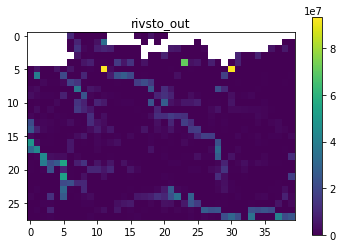

In [5]:
show_vars(model, 'rivsto_out')


Shape: (28, 40)


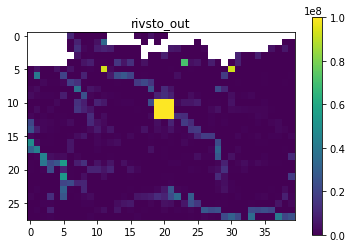

In [6]:
rivsto_out0 = reshape_vars(model.get_var('rivsto_out').copy())
rivsto_out = reshape_vars(model.get_var('rivsto_out'))

# add some extra water in the rivers
rivsto_out[10:13, 19:22] = 1e8
model.set_var('rivsto_out', rivsto_out.reshape(model.get_var_shape('rivsto_out')))
show_vars(model, 'rivsto_out')


Shape: (28, 40)


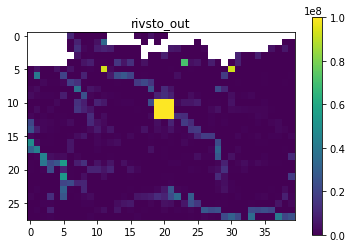

In [7]:
# run
for i in range(1):
    model.update(100)
#     model.update(86400) 
show_vars(model, 'rivsto_out')

In [8]:
rivsto_out1 = reshape_vars(model.get_var('rivsto_out').copy())

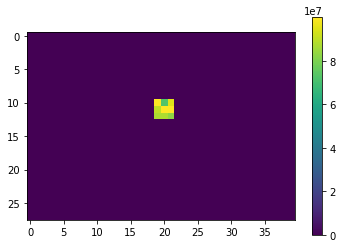

In [9]:
rivsto_dif = rivsto_out1 - rivsto_out0
plt.imshow(rivsto_dif)
plt.colorbar()

In [10]:
rivsto_dif[8:15, 17:24]

array([[        0.,         0.,         0.,         0.,         0.,
                0.,         0.],
       [        0.,         0.,         0.,         0.,         0.,
                0.,         0.],
       [        0.,         0.,  99997352.,  72795424.,  95617592.,
                0.,         0.],
       [        0.,         0.,  90522760.,  99997688.,  99998032.,
                0.,         0.],
       [        0.,         0.,  87622192.,  87770176.,  83279776.,
                0.,         0.],
       [        0.,         0.,         0.,         0.,         0.,
                0.,         0.],
       [        0.,         0.,         0.,         0.,         0.,
                0.,         0.]], dtype=float32)